# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the beautiful Scikit-Learn library.

It covers the following:

1. An end to end Scikit Learn workflow
2. Getting the data ready
3. Choose the right estimator/algorithm for the problem
4. Fit the model/algorithm and use it to make predictions on our data
5. Evaluating results
6. Improve the model
7. Save and load a trained model

In [1]:
import pandas as pd
heart_disease = pd.read_csv(r"C:\Users\cos_9\PycharmProjects\machine_learning_and_data_science_bootcamp\resources\heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X matrix. X is the features matrix, Y is the Predictable
X = heart_disease.drop("target", axis=1)

#Create Y matrix

y = heart_disease.target

In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100);

# We'll keep the default parameters

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the training data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2);

clf.fit(X_train, y_train);

In [5]:
# Make predictions
import numpy as np

y_preds = clf.predict(X_test)

In [7]:
# Evaluate the model

clf.score(X_train, y_train)
clf.score(X_test, y_test)

0.8032786885245902

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78        27
           1       0.82      0.82      0.82        34

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [9]:
print(confusion_matrix(y_test, y_preds))

[[21  6]
 [ 6 28]]


In [10]:
print(accuracy_score(y_test, y_preds))

0.8032786885245902


Trying model with 10 estimators
Model accurracy on test set: 78.68852459016394%

Trying model with 15 estimators
Model accurracy on test set: 83.60655737704919%

Trying model with 20 estimators
Model accurracy on test set: 83.60655737704919%

Trying model with 25 estimators
Model accurracy on test set: 80.32786885245902%

Trying model with 30 estimators
Model accurracy on test set: 77.04918032786885%

Trying model with 35 estimators
Model accurracy on test set: 80.32786885245902%

Trying model with 40 estimators
Model accurracy on test set: 83.60655737704919%

Trying model with 45 estimators
Model accurracy on test set: 78.68852459016394%

Trying model with 50 estimators
Model accurracy on test set: 77.04918032786885%

Trying model with 55 estimators
Model accurracy on test set: 83.60655737704919%

Trying model with 60 estimators
Model accurracy on test set: 80.32786885245902%

Trying model with 65 estimators
Model accurracy on test set: 81.9672131147541%

Trying model with 70 estimato

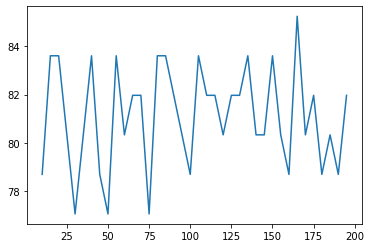

In [16]:
# Improve model

np.random.seed(42)

score_list = []

for i in range(10, 200, 5):
    print(f"Trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i)
    
    clf.fit(X_train, y_train)
    
    score = clf.score(X_test, y_test) * 100
    
    print(f"Model accurracy on test set: { score }%")
    
    score_list.append(score)
    
    print("")

import matplotlib.pyplot as plt

plt.plot(range(10, 200, 5), score_list)
    

In [20]:
# Store our model

import pickle

clf = RandomForestClassifier(n_estimators = int(np.max(score_list)))

clf.fit(X_train, y_train)

pickle.dump(clf, open("random_forest_model_20_estimators.pkl", 'wb'))

In [22]:
load_model= pickle.load( open("random_forest_model_20_estimators.pkl", 'rb'))

load_model.score(X_test, y_test)

0.8032786885245902

### Getting our data ready to be used for ML

Three main things we have to do:
    1. Split data into features and labels (usually X and y)
    2. Filling or disregarding missing values
    3. Converting non-numerical values into numerical values ( also called feature encoding ) 

In [23]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [24]:
X = heart_disease.drop("target", axis=1)

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [25]:
y = heart_disease.target

y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2)